In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


## EDA ##

* Elegi las 10 monedas con mayor capitalizacion de mercado. 
* La capitalizacion de mercado de una criptomoneda, es el valor total del conjunto de criptomonedas de la moneda en cuestion, que se han minado o están en circulación. 
* Se utiliza en muchas plataformas y exchanges como criterio para clasificar a las criptomonedas, y ya que en estre proyecto estamos iniciando a nuestro cliente en el ambito de las criptomonedas, me parecio un parametro mas confiable para tener como referencia a la hora de elegir 10 criptomonedas. 


A su vez podemos clasificarlas en 3 tipos segun capitalizacion=
* Criptomonedas de gran capitalización (más de 10.000 millones de dólares)
* Criptomonedas de capitalización media (entre 1000 millones y 10 000 millones de dólares)
* Criptomonedas de baja capitalización (menos de 1000 millones de dólares)

Las monedas elegidas son todas de gran capitalizacion


### Capitalizacion de mercado 
Número total de monedas en circulación * su precio en ese momento

* Me conecto a la API coingecko y creo distintos CSV con la informacion que considero mas relevante.
* Para empezar el EDA primero me traigo el DF que cree que tiene las 10 monedas que elegi, y ademas tiene el id, el nombre, el ranking segun el market cap, el volumen total, el precio maximo en las ultimas 24 hs y el precio minimo en las ultimas 24 hs (como trae datos actuales la ultima vez que lo actualice fue el 21/08), cambio de precio en las ultimas 24 hs y porcentaje de cambio de precio, los valores historicos maximos y minimos y sus porcentajes y sus fechas.

In [2]:
top10= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\10cripto.csv')

In [3]:
top10

,id,name,current_price,market_cap,market_cap_rank,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date
0,bitcoin,Bitcoin,25934.000000,505170783253,1,12543220744,26183.000000,25575.000000,-122.311207,-0.46942,-1.874780e+09,-0.36975,69045.000000,-62.41306,2021-11-10T14:24:11.849Z,67.810000,38171.93830,2013-07-06T00:00:00.000Z
1,ethereum,Ethereum,1643.740000,197714649390,2,10421599453,1666.290000,1597.410000,-20.469917,-1.23001,-2.144793e+09,-1.07315,4878.260000,-66.28483,2021-11-10T14:24:19.604Z,0.432979,379760.08334,2015-10-20T00:00:00.000Z
2,tether,Tether,1.001000,82844515691,3,14974278845,1.004000,0.996619,0.001903,0.19043,5.031071e+07,0.06077,1.320000,-24.42770,2018-07-24T00:00:00.000Z,0.572521,74.64750,2015-03-02T00:00:00.000Z
3,binancecoin,BNB,214.770000,33088471047,4,819517650,216.380000,204.210000,5.620000,2.68699,9.025285e+08,2.80411,686.310000,-68.66399,2021-05-10T07:24:17.097Z,0.039818,540014.32955,2017-10-19T00:00:00.000Z
4,ripple,XRP,0.518919,27462950643,5,1087987220,0.522798,0.507130,0.000106,0.02043,6.952652e+07,0.25381,3.400000,-84.70593,2018-01-07T00:00:00.000Z,0.002686,19249.27011,2014-05-22T00:00:00.000Z
5,usd-coin,USD Coin,1.000000,25908990808,6,5571671979,1.005000,0.997146,0.000282,0.02817,-3.706807e+07,-0.14287,1.170000,-14.73916,2019-05-08T00:40:28.300Z,0.877647,13.92503,2023-03-11T08:02:13.981Z
6,staked-ether,Lido Staked Ether,1644.080000,13707984807,7,53210243,1667.910000,1601.730000,-20.800637,-1.24938,-9.496924e+07,-0.68804,4829.570000,-65.95673,2021-11-10T14:40:47.256Z,482.900000,240.47558,2020-12-22T04:08:21.854Z
7,cardano,Cardano,0.260013,9119958348,8,197614620,0.261076,0.250525,0.000246,0.09452,2.645265e+07,0.29090,3.090000,-91.56971,2021-09-02T06:00:10.474Z,0.019253,1251.67982,2020-03-13T02:22:55.044Z
8,dogecoin,Dogecoin,0.063289,8923960066,9,381482875,0.064087,0.060500,0.000255,0.40438,5.884730e+07,0.66381,0.731578,-91.33084,2021-05-08T05:08:23.458Z,0.000087,72879.21861,2015-05-06T00:00:00.000Z
9,solana,Solana,20.610000,8424042500,10,468560257,21.050000,19.660000,-0.373236,-1.77833,-1.301006e+08,-1.52091,259.960000,-92.06000,2021-11-06T21:54:35.825Z,0.500801,4021.54820,2020-05-11T19:35:23.449Z


In [4]:
#Miro el tipo de dato 
top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   name                              10 non-null     object 
 2   current_price                     10 non-null     float64
 3   market_cap                        10 non-null     int64  
 4   market_cap_rank                   10 non-null     int64  
 5   total_volume                      10 non-null     int64  
 6   high_24h                          10 non-null     float64
 7   low_24h                           10 non-null     float64
 8   price_change_24h                  10 non-null     float64
 9   price_change_percentage_24h       10 non-null     float64
 10  market_cap_change_24h             10 non-null     float64
 11  market_cap_change_percentage_24h  10 non-null     float64
 12  ath        

In [5]:
#transformo la fecha en datetime porque esta en str
top10['ath_date']= pd.to_datetime(top10['ath_date'])
top10['atl_date']=pd.to_datetime(top10['atl_date'])

In [6]:
# Con la funcion describe miro los valores mas relavantes, resumen de estadistica de cada columna
top10.describe()

,current_price,market_cap,market_cap_rank,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,ath,ath_change_percentage,atl,atl_change_percentage
count,10.000000,1.000000e+01,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2946.004322,9.123663e+10,5.50000,4.651914e+09,2975.748696,2900.082192,-15.833221,-0.130222,-3.174044e+08,0.027868,7970.881158,-66.215195,55.315579,105567.711604
std,8105.103844,1.566499e+11,3.02765,5.841175e+09,8182.667304,7993.992231,38.494632,1.234547,9.405012e+08,1.180583,21549.744399,27.284529,151.728563,191933.030743
min,0.063289,8.424042e+09,1.00000,5.321024e+07,0.064087,0.060500,-122.311207,-1.778330,-2.144793e+09,-1.520910,0.731578,-92.060000,0.000087,13.925030
25%,0.639189,1.026696e+10,3.25000,4.032522e+08,0.643099,0.629502,-15.445747,-1.039862,-1.213178e+08,-0.608467,1.762500,-89.674612,0.024394,493.276640
50%,10.805500,2.668597e+10,5.50000,9.537524e+08,11.027500,10.328573,0.000176,0.024300,-5.307710e+06,-0.041050,131.680000,-67.474410,0.466890,11635.409155
75%,1286.497500,7.040550e+10,7.75000,9.209118e+09,1303.812500,1249.110000,0.000275,0.166453,5.671315e+07,0.281627,3793.755000,-63.298977,0.801365,64202.398532
max,25934.000000,5.051708e+11,10.00000,1.497428e+10,26183.000000,25575.000000,5.620000,2.686990,9.025285e+08,2.804110,69045.000000,-14.739160,482.900000,540014.329550


De las 10 criptomonedas con mayor market_cap, puedo ver un promedio de precio de las mismas de 2900 usd, pero teniendo en cuenta la variacion de un valor minimo de 0.06 a 25934, es decir entre la que mas precio tiene actualmente y la que menos tiene una gran diferencia. 

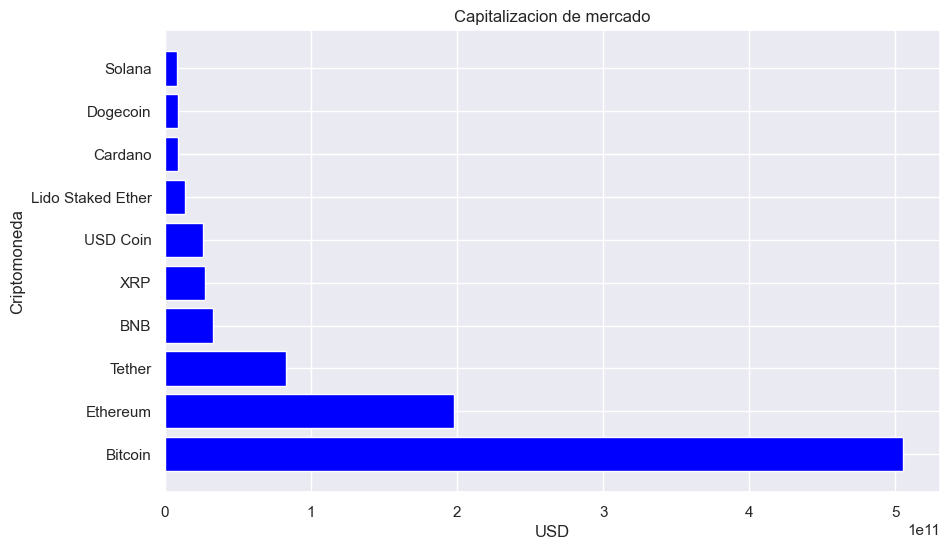

In [7]:
#Grafico las monedas y la capitalizacion de mercado
plt.figure(figsize=(10, 6))
plt.barh( top10['name'],top10['market_cap'], color='blue')
plt.xlabel('USD')
plt.ylabel('Criptomoneda')
plt.title('Capitalizacion de mercado')
plt.show()

* El gráfico proporciona una visualización de las principales criptomonedas en función de su capitalización de mercado. Utilizando un gráfico de barras horizontales, se presentan las diez criptomonedas principales, cada una representada por una barra de longitud proporcional a su capitalización de mercado en dólares estadounidenses. El eje horizontal muestra los valores de capitalización de mercado en USD, mientras que el eje vertical enumera el nombre de cada criptomoneda.

* Este tipo de representación permite una rápida comparación entre las diferentes criptomonedas en términos de su valor de mercado. La elección del color azul para las barras agrega coherencia visual y facilita la identificación de las criptomonedas en el gráfico.

* En general, el gráfico resalta claramente las criptomonedas líderes en términos de capitalización de mercado y proporciona una instantánea visual de su posición relativa en el mercado en ese momento específico. La visualización podría ayudar a los observadores a comprender rápidamente cómo se distribuye el valor entre estas monedas digitales y cuáles son las más prominentes en ese momento.

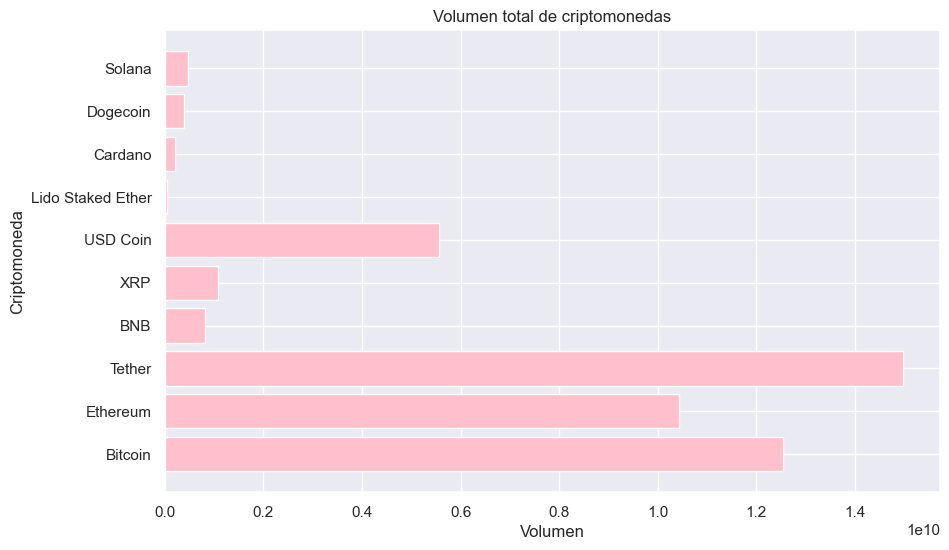

In [8]:
#Grafico las monedas y volumen
plt.figure(figsize=(10, 6))
plt.barh( top10['name'],top10['total_volume'], color='pink')
plt.xlabel('Volumen')
plt.ylabel('Criptomoneda')
plt.title('Volumen total de criptomonedas')
plt.show()

* Este gráfico brinda una representación visual de las principales criptomonedas en relación con su volumen total. Implementando un gráfico de barras horizontales, se exhiben las diez criptomonedas más destacadas, cada una simbolizada por una barra cuya longitud es proporcional a su volumen total, medido en algún tipo de unidad estándar. El eje horizontal denota los valores de volumen, mientras que el eje vertical enumera los nombres de las criptomonedas.

* La elección del color rosa para las barras agrega un elemento visual distintivo al gráfico y facilita la identificación de las diferentes criptomonedas representadas.

* De manera global, el gráfico resalta con claridad las criptomonedas más activas en términos de volumen de transacciones y proporciona una instantánea visual de su posición relativa en el mercado en ese momento particular. Esta visualización puede ayudar a los observadores a comprender de manera rápida cómo se distribuyen las actividades de transacción entre estas monedas digitales y cuáles son las más líquidas en ese momento específico.

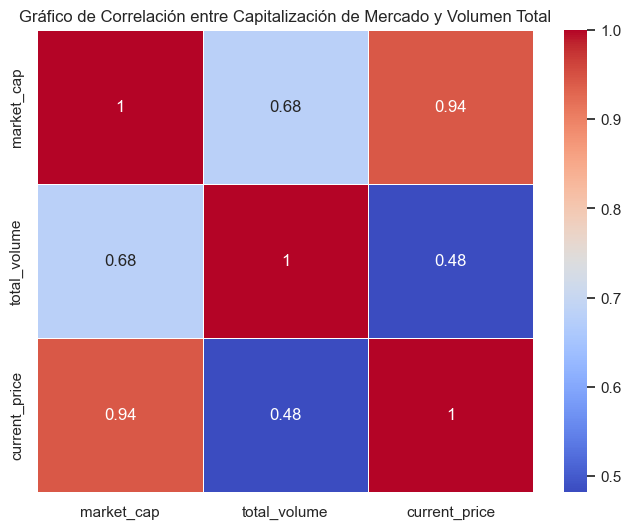

In [9]:
# Creo el DataFrame con las dos columnas que deseo comparar
top10mkt= top10[['market_cap', 'total_volume', 'current_price']]

# Crear un gráfico de correlación utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(top10mkt.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Gráfico de Correlación entre Capitalización de Mercado y Volumen Total')
plt.show()

* El gráfico de correlación, organizado en una cuadrícula de colores, muestra la relación entre las diferentes métricas. Los valores numéricos de correlación se anotan dentro de cada celda del gráfico, lo que proporciona información sobre la intensidad y la dirección de la relación entre las variables. Los tonos de color en el mapa de calor ayudan a identificar rápidamente áreas de alta y baja correlación.

* El título del gráfico resalta que la visualización se centra en la relación entre la capitalización de mercado y el volumen total de transacciones. Este tipo de gráfico permite a los observadores comprender cómo estas dos métricas están interrelacionadas en el contexto de las criptomonedas líderes. En última instancia, la visualización puede ayudar a identificar patrones y tendencias que podrían ser útiles para la toma de decisiones en el ámbito de las inversiones y el análisis de criptomonedas

Al realizar un mapa de calor de correlacion entre capitalizacion de mercado, precio y volumen, se puede ver una clara correlacion positiva entre la capitalizacion de mercado y el precio, luego entre el volumen total y la capitalizacion del mercado. Esto a su vez lo habiamos visto al aclarar mas arriba que la formula de capitalizacion de mercado es igual a volumen total * precio, entonces claramente cualquiera de estos dos valores aumentan, aumentara la capitalizacion de mercado. En cambio no podemos decir que hay una correlacion tan clara entre el volumen y el precio. 

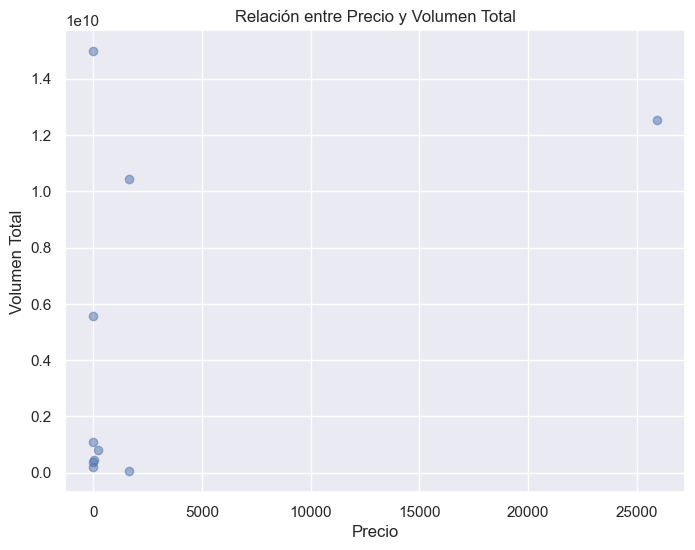

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(top10['current_price'], top10['total_volume'], alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Volumen Total')
plt.title('Relación entre Precio y Volumen Total')
plt.grid(True)
plt.show()

### Precio actual 

! Aclaracion = Creo el csv conectandome a la api con fecha del 21 de agosto, que si me conectara en este momento me trae el precio actual, al dia y la hora que realizo la consulta

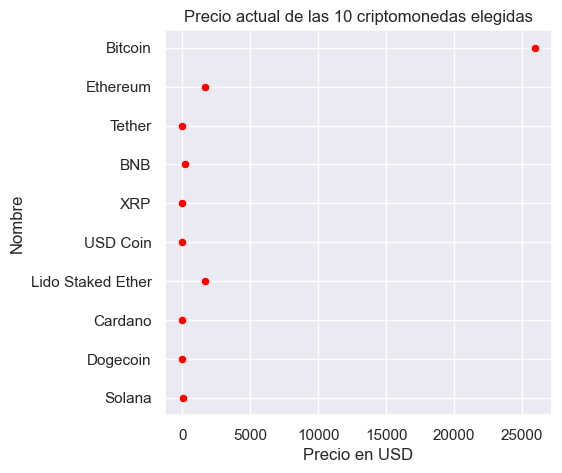

In [11]:

# Creo un scatterplot 
plt.figure(figsize=(5,5))
sns.scatterplot(data=top10, x='current_price',y='name', color='red')

# Personalizar el gráfico
plt.title('Precio actual de las 10 criptomonedas elegidas')
plt.xlabel('Precio en USD')
plt.ylabel('Nombre')

# Mostrar el gráfico
plt.show()

* El gráfico proporciona una representación visual clara y concisa de los precios actuales de las diez criptomonedas seleccionadas. Utilizando un gráfico de dispersión, cada criptomoneda se representa mediante un punto en el gráfico. La posición horizontal de cada punto corresponde al precio actual de la criptomoneda en dólares estadounidenses, mientras que la posición vertical muestra el nombre de la criptomoneda.

* La elección del color rojo para los puntos añade coherencia visual y facilita la identificación de las criptomonedas en el gráfico. El diseño del gráfico enfatiza la comparación de los precios actuales entre las diferentes criptomonedas.


<Figure size 1000x1000 with 0 Axes>

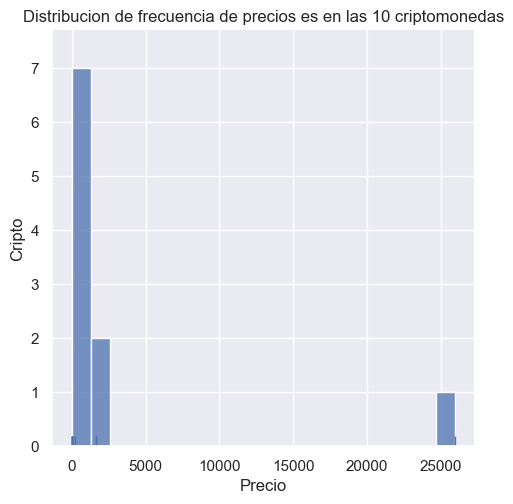

In [12]:
plt.figure(figsize=(10,10))
sns.displot(top10['current_price'], bins=20, rug = True)
plt.title('Distribucion de frecuencia de precios es en las 10 criptomonedas')
plt.xlabel('Precio')
plt.ylabel('Cripto')
plt.show()

Con estos dos ultimos graficos podemos ver al diferencia entre el precio de bitcoin y del resto de las monedas, es bastante la diferencia, a pesar de que comparten el ranking de las 10 monedas con mas capitalizacion del mercado. 

* Desde una perspectiva técnica, el gráfico es un recurso valioso para explorar la distribución y variabilidad de los precios en estas criptomonedas líderes. Las alturas y formas de las barras en el gráfico revelan insights sobre las áreas de mayor densidad de precios y las posibles áreas de volatilidad. Además, las ubicaciones específicas de los puntos "rug" permiten la identificación de valores atípicos o excepcionales.

* En síntesis, este gráfico de distribución de frecuencia brinda una visión técnica y profunda de la distribución de precios en las principales criptomonedas. Es una herramienta esencial para los analistas que buscan comprender mejor la estructura de precios y la variabilidad dentro de este emocionante y dinámico mercado.

### Precios maximos y minimos historicos

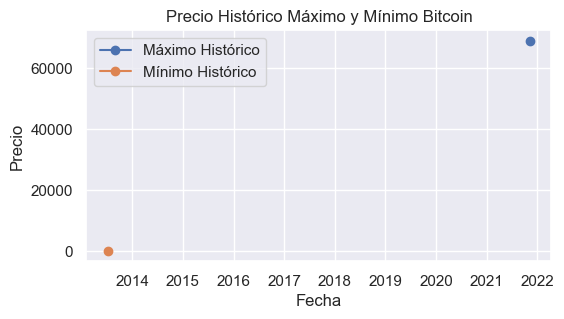

In [13]:
top10bit=top10[top10['name']=='Bitcoin']

plt.figure(figsize=(6, 3))
plt.plot(top10bit['ath_date'], top10bit['ath'], label='Máximo Histórico', marker='o')
plt.plot(top10bit['atl_date'], top10bit['atl'], label='Mínimo Histórico', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio Histórico Máximo y Mínimo Bitcoin')
plt.legend()
plt.grid(True)
plt.show()

* El gráfico ofrece una representación visual detallada del historial de precios máximo (ATH, por sus siglas en inglés) y mínimo (ATL, por sus siglas en inglés) de Bitcoin, la criptomoneda líder en el mercado. Para enfocarse en Bitcoin, se ha seleccionado un subconjunto específico de datos llamado "top10bit".


* Los ejes del gráfico están dedicados a la temporalidad y los precios. El eje x representa las fechas en las que se alcanzaron los valores extremos, mientras que el eje y muestra los precios correspondientes. L

* Este gráfico es esencial para los analistas que desean inspeccionar y comparar el comportamiento histórico de los precios extremos de Bitcoin. Revela momentos clave en la evolución del precio y puede ayudar a identificar tendencias y patrones en los máximos y mínimos históricos a lo largo del tiempo.

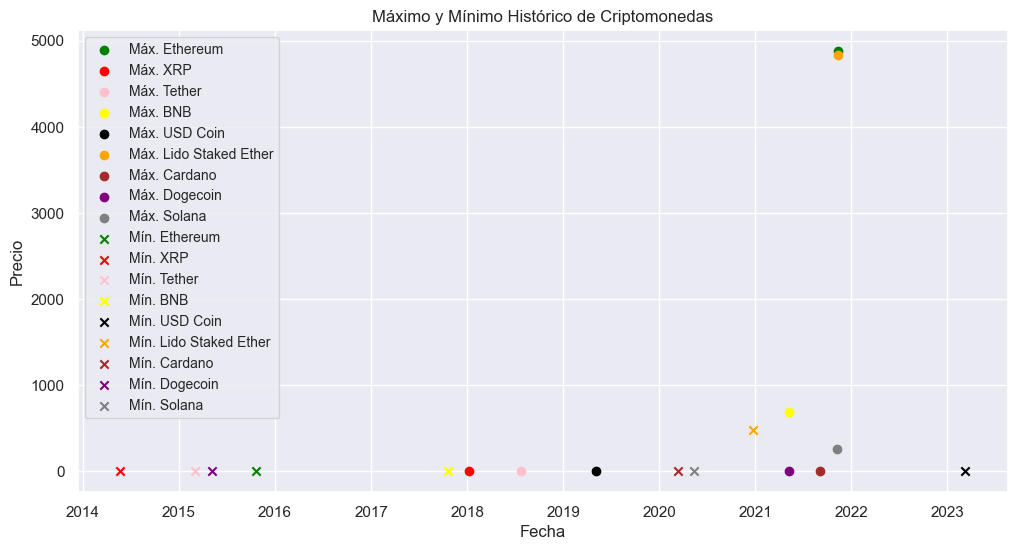

In [14]:
colores_criptos = {
    'Ethereum': 'green',
    'XRP': 'red',
    'Tether':'pink',
    'BNB':'yellow',
    'USD Coin': 'black',
    'Lido Staked Ether':'orange',
    'Cardano': 'brown',
    'Dogecoin':'purple',
    'Solana':'grey'
    # Agrega más criptomonedas y colores según sea necesario
}

plt.figure(figsize=(12, 6))

# Para cada criptomoneda, graficar el precio máximo histórico
for cripto, color in colores_criptos.items():
    data = top10[top10['name'] == cripto]
    plt.scatter(data['ath_date'], data['ath'], label=f'Máx. {cripto}', color=color, marker='o')

# Para cada criptomoneda, graficar el precio mínimo histórico
for cripto, color in colores_criptos.items():
    data = top10[top10['name'] == cripto]
    plt.scatter(data['atl_date'], data['atl'], label=f'Mín. {cripto}', color=color, marker='x')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Máximo y Mínimo Histórico de Criptomonedas')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

En estos dos grafico podemos ver los valores historicos maximos y minimos de cada moneda. Es notorio como si bien cada moneda tuvo sus valores minimos y maximos en distintos momentos a lo largo de los años 6 de ellas no superan los 100usd, BNB supera los 500usd y Ethereum y Lido Staked se acercan a los 5000 usd. 

* Se nota la diferencia de Bitcoin con el resto, y se nota como llega a su pico maximo cercano a los 70000 usd a fines del 2021. 




* Este gráfico es una representación visual multifacética de los precios máximos históricos (ATH) y mínimos históricos (ATL) de varias criptomonedas prominentes. El código implementado utiliza un diccionario llamado "colores_criptos" para asignar colores específicos a diferentes criptomonedas, lo que brinda una identificación visual clara y coherente en todo el gráfico.

* Se han utilizado marcadores "o" y "x" para denotar los máximos y mínimos históricos, respectivamente, en cada criptomoneda. Los colores asociados a cada criptomoneda en el diccionario son utilizados para resaltar y diferenciar los datos.

* El gráfico emplea bucles para iterar a través del diccionario "colores_criptos", generando así puntos dispersos en función de las fechas y los valores extremos de cada criptomoneda. Las etiquetas asociadas a cada punto reflejan la criptomoneda y el tipo de valor extremo (máximo o mínimo) que representa.





### Porcentaje de cambio de precio en 24 hs 

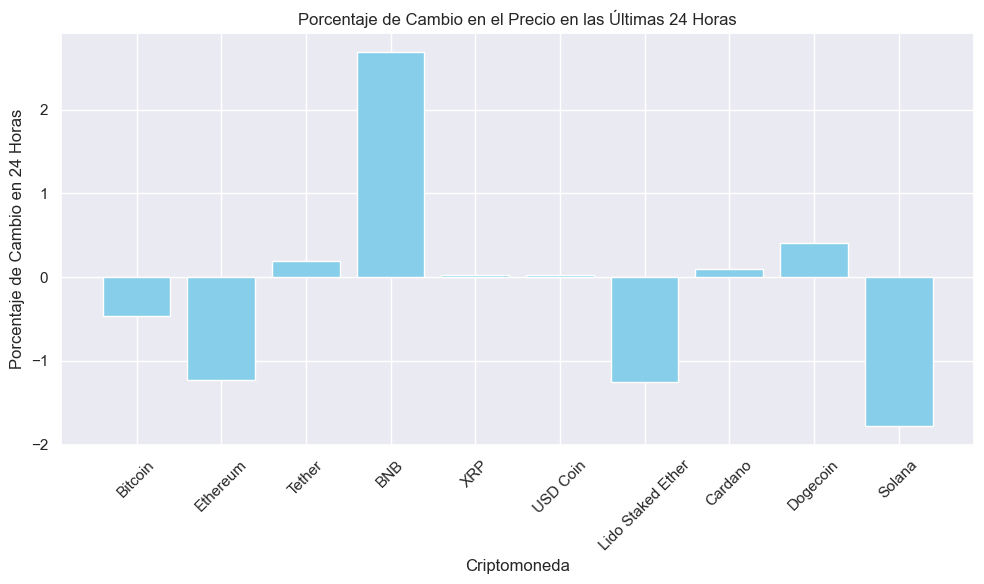

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(top10['name'], top10['price_change_percentage_24h'], color='skyblue')
plt.xlabel('Criptomoneda')
plt.ylabel('Porcentaje de Cambio en 24 Horas')
plt.title('Porcentaje de Cambio en el Precio en las Últimas 24 Horas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este grafico podemos ver el porcentaje de cambio de precio en 24 hs del precio de las monedas. Esto nos puede dar una idea de lo volatil que es el mercado de las criptomonedas, y de la mayor o menor volatilidad de cada una en base a este cambio, asi como tambien la estabilidad. 

* Lo que podemos observar aqui es una manera concisa y visualmente atractiva de examinar los cambios en los precios de las criptomonedas durante un período de 24 horas. Es especialmente útil para observar rápidamente las tendencias ascendentes o descendentes en los precios y para comparar el rendimiento relativo de varias criptomonedas en un marco temporal específico.